# Case Study: Analysis of Bike-Sharing Trends

As a junior data analyst at Cyclistic, a fictional bike-sharing company, my task is to analyze bike usage differences between casual cyclists and annual members. The marketing director sees increasing annual memberships as vital for the company's growth. The insights gathered will inform a marketing strategy designed to convert casual cyclists into annual members.

* Data [License Agreement](https://divvybikes.com/data-license-agreement)

#### ASK: Define the problem

* How do annual members and occasional cyclists differ in their use of Cyclistic bikes?
* What is the problem I am trying to solve?

To complete the business task *"Design marketing strategies aimed at converting occasional cyclists into annual members"*, it is necessary to understand the differences between occasional and annual users. This will help determine why occasional cyclists would purchase a membership and how digital media could affect your marketing tactics. To do this, you need to analyze historical bike trip data, identify the differences between the two types of users (casual and member), and understand what influences users to purchase an annual membership, in order to design appropriate marketing strategies that allow you to make a profit.

#### PREPARE: Collect data, store information

* Where is your data located?
* How is the data organized?

The data is located in an HTML file; it contains files organized in ZIP folders, sorted by year and month. Inside the ZIP files are CSV files that contain information about trips made in a given month and year.

#### PROCESS: Cleaning the data and checking its integrity

* What steps can I take to ensure data integrity?
* How can I clean the data and verify a successful cleanup?

Documentation for all data cleaning and manipulation can be found in this R Markdown document.

#### ANALYZE: Find patterns, relationships and trends, use visualizations 

#### SHARE: Communication and interpretation of the results

#### ACT: Using the insight to solve the problem

## Step 1: Install R packages

Packages play a crucial role in R, as they contain functions that enable users to perform various tasks. While some packages come pre-installed, many others can be downloaded from external sources like the Comprehensive R Archive Network (CRAN).  

The **tidyverse** package is a collection of individual packages designed to simplify a wide range of data analysis tasks.  

To install **tidyverse**, run the following code in the code chunk below. 

In [1]:
# System of packages with common philosophy for data analysis
install.packages("tidyverse", lib = "/usr/local/lib/R/site-library")

In [2]:
# Load libraries

library(tidyverse) 
library(purrr) # To work with data collections
library(readr) # For importing data
library(dplyr) # For data manipulation
library(tidyr) # For data cleaning
library(lubridate) # To work with dates and times
library(geosphere) # For geographic applications
library(hms) # For displaying values in the hh:mm:ss format
library(scales) # To override the default breaks, labels, and more

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     


── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors



Attaching package: ‘hms’




The following object is masked from ‘package:lubridate’:

    hms





Attaching package: ‘scales’




The following object is masked from ‘package:purrr’:

    discard




The following object is masked from ‘package:readr’:

    col_factor




## Step 2: Download the past 12 months of historical data

Use Cyclistic's historical ride data to analyze and identify trends. Download the past 12 months of Cyclistic ride data.

* [Historical Data](https://divvy-tripdata.s3.amazonaws.com/index.html) 

In [3]:
# Define the date range (last 12 months)

last_12_months <- format(seq(as.Date("2024-03-01"), as.Date("2025-02-01"), by = "month"), "%Y%m")

# URL

url_base <- "https://divvy-tripdata.s3.amazonaws.com/"

# Create a list of the files to download (from March 2024 to February 2025)

to_download <- paste0(url_base, last_12_months, "-divvy-tripdata.zip")


In [4]:
# Download files and create a Data frame

bicycle_data <- to_download %>%
  map_dfr(~{
    temporary_file <- tempfile(fileext = ".zip") # Create temporary ZIP file
    download.file(.x, temporary_file, mode = "wb")  # Download file using .x as current URL
    
    temporary_folder <- tempfile() 
    unzip(temporary_file, exdir = temporary_folder) # Extract CSV from ZIP
    
    csv_file <- list.files(temporary_folder, full.names = TRUE, pattern = "*.csv")
    
    read_csv(csv_file) # Read CSV
  })

Rows: 301687 Columns: 13


── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): ride_id, rideable_type, start_station_name, start_station_id, end_...
dbl  (4): start_lat, start_lng, end_lat, end_lng
dttm (2): started_at, ended_at



ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 415025 Columns: 13


── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): ride_id, rideable_type, start_station_name, start_station_id, end_...
dbl  (4): start_lat, start_lng, end_lat, end_lng
dttm (2): started_at, ended_at



ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 609493 Columns: 13


── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): ride_id, rideable_type, start_station_name, start_station_id, end_...
dbl  (4): start_lat, start_lng, end_lat, end_lng
dttm (2): started_at, ended_at



ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 710721 Columns: 13


── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): ride_id, rideable_type, start_station_name, start_station_id, end_...
dbl  (4): start_lat, start_lng, end_lat, end_lng
dttm (2): started_at, ended_at



ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 748962 Columns: 13


── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): ride_id, rideable_type, start_station_name, start_station_id, end_...
dbl  (4): start_lat, start_lng, end_lat, end_lng
dttm (2): started_at, ended_at



ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 755639 Columns: 13


── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): ride_id, rideable_type, start_station_name, start_station_id, end_...
dbl  (4): start_lat, start_lng, end_lat, end_lng
dttm (2): started_at, ended_at



ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 821276 Columns: 13


── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): ride_id, rideable_type, start_station_name, start_station_id, end_...
dbl  (4): start_lat, start_lng, end_lat, end_lng
dttm (2): started_at, ended_at



ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 616281 Columns: 13


── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): ride_id, rideable_type, start_station_name, start_station_id, end_...
dbl  (4): start_lat, start_lng, end_lat, end_lng
dttm (2): started_at, ended_at



ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 335075 Columns: 13


── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): ride_id, rideable_type, start_station_name, start_station_id, end_...
dbl  (4): start_lat, start_lng, end_lat, end_lng
dttm (2): started_at, ended_at



ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 178372 Columns: 13


── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): ride_id, rideable_type, start_station_name, start_station_id, end_...
dbl  (4): start_lat, start_lng, end_lat, end_lng
dttm (2): started_at, ended_at



ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 138689 Columns: 13


── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): ride_id, rideable_type, start_station_name, start_station_id, end_...
dbl  (4): start_lat, start_lng, end_lat, end_lng
dttm (2): started_at, ended_at



ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 151880 Columns: 13


── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): ride_id, rideable_type, start_station_name, start_station_id, end_...
dbl  (4): start_lat, start_lng, end_lat, end_lng
dttm (2): started_at, ended_at



ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


## Step 3: Check the data

Displays a compact and quick view of the data structure, allowing you to see the number of columns and rows, the type of variables, and the first values in each column.

In [5]:
# Inspect the content 

glimpse(bicycle_data)

Rows: 5,783,100
Columns: 13
$ ride_id            <chr> "64FBE3BAED5F29E6", "9991629435C5E20E", "E5C9FECD5B…
$ rideable_type      <chr> "electric_bike", "electric_bike", "electric_bike", …
$ started_at         <dttm> 2024-03-05 18:33:11, 2024-03-06 17:15:14, 2024-03-…
$ ended_at           <dttm> 2024-03-05 18:51:48, 2024-03-06 17:16:04, 2024-03-…
$ start_station_name <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA,…
$ start_station_id   <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA,…
$ end_station_name   <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA,…
$ end_station_id     <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA,…
$ start_lat          <dbl> 41.94, 41.91, 41.91, 41.90, 41.93, 41.93, 41.94, 41…
$ start_lng          <dbl> -87.65, -87.64, -87.64, -87.63, -87.70, -87.70, -87…
$ end_lat            <dbl> 41.96, 41.91, 41.92, 41.89, 41.93, 41.95, 41.95, 41…
$ end_lng            <dbl> -87.65, -87.64, -87.64, -87.63, -87.72, -87.68, -87…
$ member_cas

In [6]:
# To see the 12 months 

bicycle_data %>%
  mutate(month = lubridate::month(started_at, label = TRUE)) %>%
  distinct(month)

month
<ord>
Mar
Apr
May
Jun
Jul
Aug
Sep
Oct
Nov


## Step 4: Cleaning data 

Identify types of dirty data: 

* Duplicate
* Missing values
* Inaccurate or inconsistent data
* Misspelling
* And more

In [7]:
table(bicycle_data$member_casual) # There are  2131942 "casual rides" and  3651158 "member rides" 



 casual  member 
2131942 3651158 

In [8]:
# Check duplicates

sum(duplicated(bicycle_data))

[1] 0

In [9]:
# Check for unique values, misspelling 

unique(bicycle_data$rideable_type)

[1] "electric_bike"    "classic_bike"     "electric_scooter"

In [10]:
# Count rideable_type

bicycle_data %>%
  count(rideable_type)

rideable_type,n
<chr>,<int>
classic_bike,2621171
electric_bike,3017592
electric_scooter,144337


In [11]:
# Check for inconsistent data across locations

summary(bicycle_data[, c("start_lat", "start_lng", "end_lat", "end_lng")])

   start_lat       start_lng         end_lat         end_lng       
 Min.   :41.64   Min.   :-87.91   Min.   :16.06   Min.   :-144.05  
 1st Qu.:41.88   1st Qu.:-87.66   1st Qu.:41.88   1st Qu.: -87.66  
 Median :41.90   Median :-87.64   Median :41.90   Median : -87.64  
 Mean   :41.90   Mean   :-87.65   Mean   :41.90   Mean   : -87.65  
 3rd Qu.:41.93   3rd Qu.:-87.63   3rd Qu.:41.93   3rd Qu.: -87.63  
 Max.   :42.07   Max.   :-87.52   Max.   :87.96   Max.   : 152.53  
                                  NA's   :6744    NA's   :6744     

In [12]:
# Check for missing values
 
colSums(is.na(bicycle_data)) # There are 5,783,100 rows in total

ride_id      rideable_type         started_at           ended_at 
                 0                  0                  0                  0 
start_station_name   start_station_id   end_station_name     end_station_id 
           1080148            1080148            1110075            1110075 
         start_lat          start_lng            end_lat            end_lng 
                 0                  0               6744               6744 
     member_casual 
                 0

There are 1,080,148 rows with no values, corresponding to electric bicycles, which probably do not have a fixed station.

*"Before deleting rows or modifying data, it is good practice to create a copy of the dataset and then transform it."*  

In [13]:
# Replace the NA values with "No Fixed Station",
# where the "ride type" column corresponds to an electric bike or scooter

t_bike_data <- bicycle_data %>%
  mutate(
    start_station_name = ifelse(rideable_type %in% c("electric_bike", "electric_scooter") & is.na(start_station_name),
                                "No fixed station", start_station_name),
    start_station_id = ifelse(rideable_type %in% c("electric_bike", "electric_scooter") & is.na(start_station_id),
                              "No fixed station", start_station_id),
    end_station_name = ifelse(rideable_type %in% c("electric_bike", "electric_scooter") & is.na(end_station_name),
                              "No fixed station", end_station_name),
    end_station_id = ifelse(rideable_type %in% c("electric_bike", "electric_scooter") & is.na(end_station_id),
                            "No fixed station", end_station_id),
    end_lat = replace_na(end_lat, NA_real_),
    end_lng = replace_na(end_lng, NA_real_)
  )

# To see a summary of the data

glimpse(t_bike_data)

Rows: 5,783,100
Columns: 13
$ ride_id            <chr> "64FBE3BAED5F29E6", "9991629435C5E20E", "E5C9FECD5B…
$ rideable_type      <chr> "electric_bike", "electric_bike", "electric_bike", …
$ started_at         <dttm> 2024-03-05 18:33:11, 2024-03-06 17:15:14, 2024-03-…
$ ended_at           <dttm> 2024-03-05 18:51:48, 2024-03-06 17:16:04, 2024-03-…
$ start_station_name <chr> "No fixed station", "No fixed station", "No fixed s…
$ start_station_id   <chr> "No fixed station", "No fixed station", "No fixed s…
$ end_station_name   <chr> "No fixed station", "No fixed station", "No fixed s…
$ end_station_id     <chr> "No fixed station", "No fixed station", "No fixed s…
$ start_lat          <dbl> 41.94, 41.91, 41.91, 41.90, 41.93, 41.93, 41.94, 41…
$ start_lng          <dbl> -87.65, -87.64, -87.64, -87.63, -87.70, -87.70, -87…
$ end_lat            <dbl> 41.96, 41.91, 41.92, 41.89, 41.93, 41.95, 41.95, 41…
$ end_lng            <dbl> -87.65, -87.64, -87.64, -87.63, -87.72, -87.68, -87…
$ member_cas

Another handy function is summarize(), to generate a wide range
of summary statistics of the data.

In [14]:
# Add a column with the distance calculated by latitude and longitude

library(geosphere)

t_bike_data <- t_bike_data %>%
  mutate(
    distance_meters = distVincentySphere(cbind(start_lng, start_lat), cbind(end_lng, end_lat))
  )

summary(t_bike_data$distance_meters)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
      0     877    1573    2157    2802 5764585    6744 

In [15]:
# Check the column distance_meters from greatest to least distance

t_bike_data <- t_bike_data %>%
  arrange(desc(distance_meters))

# To see the first rows 

head(t_bike_data)

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,distance_meters
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
F800C79DFF7E9180,electric_bike,2024-10-23 09:38:43,2024-10-23 09:52:54,Stetson Ave & South Water St,TA1308000029,No fixed station,No fixed station,41.88683,-87.62232,83.14,152.53,member,5764585
62DE8EEB7371193B,electric_bike,2024-09-04 18:54:23,2024-09-04 19:02:39,Clark St & Elm St,TA1307000039,No fixed station,No fixed station,41.90297,-87.63128,72.88,1.72,member,5582849
BFB4AA1136202211,electric_bike,2024-07-27 17:17:18,2024-07-27 18:23:12,No fixed station,No fixed station,No fixed station,No fixed station,41.85000,-87.63000,87.96,-144.05,casual,5237006
AC3B1B61AD56FB4D,electric_bike,2024-09-17 13:56:29,2024-09-17 14:10:34,Milwaukee Ave & Wabansia Ave,13243,No fixed station,No fixed station,41.91262,-87.68139,32.53,-129.71,casual,3827761
B9D700B54FEC231D,electric_bike,2024-08-13 13:51:29,2024-08-13 14:07:09,Western Ave & Winnebago Ave,13068,No fixed station,No fixed station,41.91552,-87.68702,16.06,-84.82,casual,2891286
A35B93238902E7C3,electric_bike,2024-08-23 18:54:38,2024-08-23 19:04:50,No fixed station,No fixed station,No fixed station,No fixed station,41.90000,-87.63000,21.79,-92.62,member,2286733


To know the **length of each trip** in seconds or in HH:MM:SS format, it is necessary to subtract the “started_at” column from the “ended_at” column.

In [16]:
# To calculate the length of each ride, define the format

t_bike_data <- t_bike_data %>%
  mutate(
    started_at = as.POSIXct(started_at, format = "%Y-%m-%d %H:%M:%S"),
    ended_at = as.POSIXct(ended_at, format = "%Y-%m-%d %H:%M:%S")
  )

In [17]:
# Ride length in seconds

t_bike_data <- t_bike_data %>%
  mutate(ride_length_secs = as.numeric(difftime(ended_at, started_at, units = "secs")))

t_bike_data <- t_bike_data %>%
  mutate(ride_length_secs = as.numeric(ended_at - started_at))

# Order by ride length 

t_bike_data <- t_bike_data %>%
  arrange(desc(ride_length_secs))

# Check values

summary(t_bike_data$ride_length_secs)


     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-164899.0     331.0     580.6    1027.0    1032.0   93596.0 

There are some inconsistent values, such as rides with negative results and rides lasting more than 24 hours, which are inaccurate. These outliers need to be removed, as they can affect the analysis. *This will be done in later chunks of code.*

In [18]:
# Filter negative values in ride length

t_bike_data <- t_bike_data %>%
  filter(ride_length_secs >= 0) 

summary(t_bike_data$ride_length_secs)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0   331.0   580.6  1027.1  1032.0 93596.0 

In [19]:
# Convert seconds to HH:MM:SS (Add new column)

t_bike_data <- t_bike_data %>%
  mutate(
    ride_length_hms = hms::as_hms(ride_length_secs)
  )

To identify trends in trips per user (member or casual), it is necessary to calculate the day of the week on which each trip began.

In [20]:
# Calculates the day of the week on which each ride began
# 1 = Sunday, 7 = Saturday

t_bike_data <- t_bike_data %>%
  mutate(
    day_of_week = as.numeric(format(started_at, "%u")) %% 7 + 1
  )

In [21]:
# Check for missing values in the transform data set

colSums(is.na(t_bike_data)) # Some missing values at the end of some rides


ride_id      rideable_type         started_at           ended_at 
                 0                  0                  0                  0 
start_station_name   start_station_id   end_station_name     end_station_id 
                 0                  0               6946               6946 
         start_lat          start_lng            end_lat            end_lng 
                 0                  0               6744               6744 
     member_casual    distance_meters   ride_length_secs    ride_length_hms 
                 0               6744                  0                  0 
       day_of_week 
                 0

There are missing values in the *"end_lat"* and *"end_lng"* columns. This could indicate that some rides didn't complete on schedule, possibly due to a GPS issue. For now, rides with missing *"end_lat"* and *"end_lng"* values will be saved in a separate table.

In [22]:
# Add new column: incomplete_rides

t_bike_data <- t_bike_data %>%
  mutate(incomplete_ride = ifelse(is.na(end_lat) | is.na(end_lng), "Yes", "No"))


In [23]:
# Filter by completes rides, create a new table with the "complete rides" 

complete_rides <- t_bike_data %>%
  filter(incomplete_ride == "No")

# Create a table with the "incomplete rides"

incomplete_rides <- t_bike_data %>% filter(incomplete_ride == "Yes")

# Check missing values in the new table "completes_rides"

colSums(is.na(complete_rides))

ride_id      rideable_type         started_at           ended_at 
                 0                  0                  0                  0 
start_station_name   start_station_id   end_station_name     end_station_id 
                 0                  0                202                202 
         start_lat          start_lng            end_lat            end_lng 
                 0                  0                  0                  0 
     member_casual    distance_meters   ride_length_secs    ride_length_hms 
                 0                  0                  0                  0 
       day_of_week    incomplete_ride 
                 0                  0

There are still some rows with missing values, as there are few, they will be deleted.

In [24]:
# Delete rows with missing values in the "complete_rides"  

complete_rides <- complete_rides %>%
  filter(!is.na(end_station_name) & !is.na(end_station_id))

complete_rides_clean <- complete_rides %>%
  filter(!(distance_meters == 0 & ride_length_secs == 0))

Since two tables have been created, one with completed trips and one with incomplete trips, which refer to trip completion values, the *"incomplete_ride"* column with yes or no values is no longer needed.

In [25]:
# Delete the column incomplete_ride in both tables

complete_rides_clean <- complete_rides_clean %>%
  select(-incomplete_ride)

incomplete_rides <- incomplete_rides %>%
  select(-incomplete_ride)

In [26]:
# Clean the data by quartiles and interquartile range (IQR)

summary(complete_rides_clean[, c("ride_length_secs", "distance_meters")])

Q1 <- quantile(complete_rides_clean$ride_length_secs, 0.25)
Q3 <- quantile(complete_rides_clean$ride_length_secs, 0.75)
IQR <- Q3 - Q1

# Define limits

lower_limit <- Q1 - 1.5 * IQR
upper_limit <- Q3 + 1.5 * IQR

 ride_length_secs  distance_meters  
 Min.   :    0.0   Min.   :      0  
 1st Qu.:  330.8   1st Qu.:    877  
 Median :  580.0   Median :   1573  
 Mean   :  920.5   Mean   :   2157  
 3rd Qu.: 1029.3   3rd Qu.:   2802  
 Max.   :90562.0   Max.   :5764585  

In [27]:
# Delete outliers or inaccurate data 

complete_rides_clean <- complete_rides_clean %>%
  filter(ride_length_secs >= lower_limit & ride_length_secs <= upper_limit)

# Verify cleansing

summary(complete_rides_clean$ride_length_secs)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0   314.6   536.4   654.0   889.5  2077.1 

## Summary of the cleansing:

The dataset was sorted, filtered, and cleaned. Incorrect data, including missing values, were identified and filled with a message, while others were removed. Inaccurate or inconsistent data were considered outliers in terms of travel time and distance and were therefore removed.

Furthermore, *the filtered data was divided into two tables*, one with complete routes and another with incomplete routes with respect to the final latitude and final longitude columns.

## Step 5: Looking for trends

Find out the differences between occasional and annual users, with simple visualizations.

**Calculates and Visualize:**

* Average ride length by user
* Average ride length by user and day
* Number of Rides by User and Day
* Average Ride Length by User and Month
* Number of Rides by User and Month

In [28]:
# Average ride length by type of user in seconds

average_ride_length <- complete_rides_clean %>%
  group_by(member_casual) %>%
  summarize(average_ride_length = mean(ride_length_secs, na.rm = TRUE))

average_ride_length

member_casual,average_ride_length
<chr>,<dbl>
casual,730.1472
member,614.1886


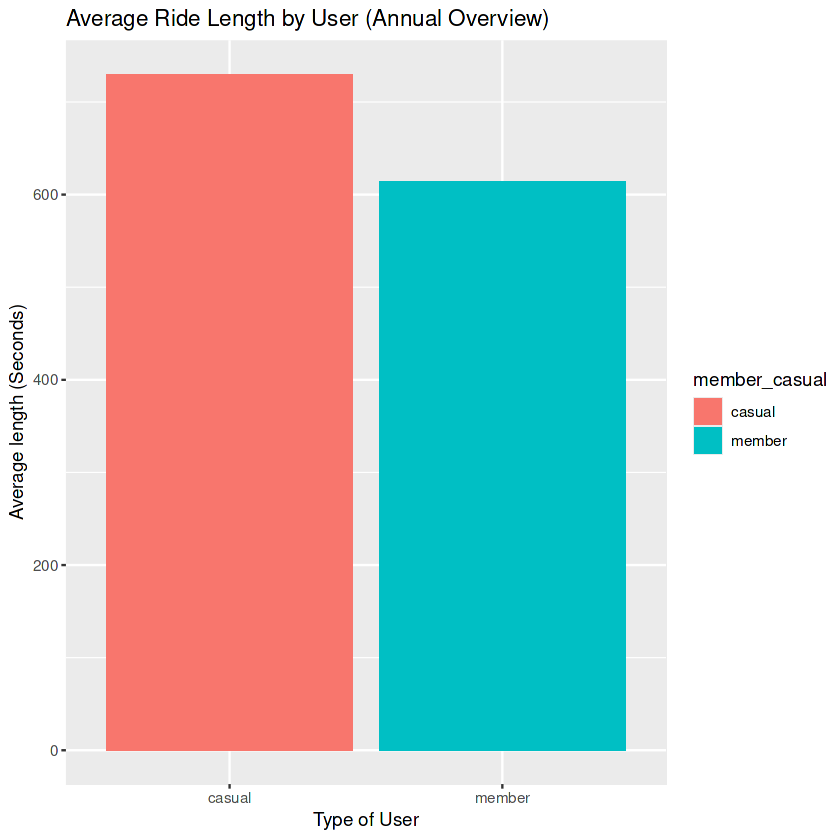

In [29]:
# Plot: "Average Ride Length by User"

ggplot(average_ride_length, 
       aes(x = member_casual,
           y = average_ride_length,
           fill = member_casual)) +
  geom_bar(stat = "identity") +
  labs(title = "Average Ride Length by User (Annual Overview)",
       x = "Type of User",
       y = "Average length (Seconds)") 

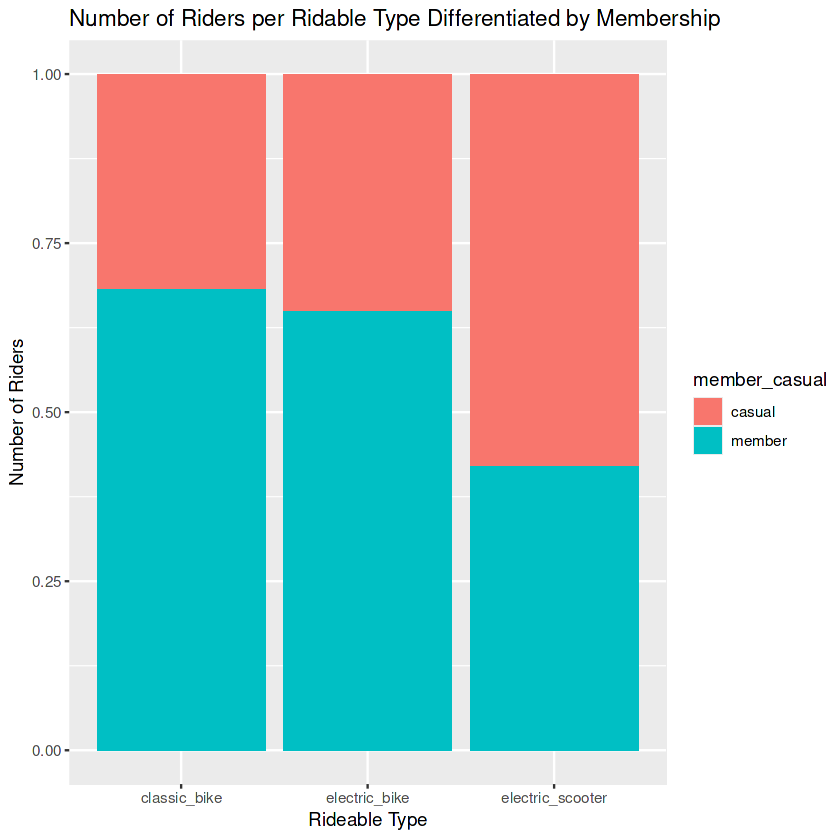

In [30]:
# Plot: "Number of Riders per Ridable Type Differentiated by Membership"

ggplot(complete_rides_clean, aes(x = rideable_type, fill = member_casual)) +
  geom_bar(position = "fill") +
  labs(title = "Number of Riders per Ridable Type Differentiated by Membership",
       x = "Rideable Type", y = "Number of Riders")

In [31]:
# Rides of less than 2 hours depending on the type of bicycle and user

df_filtered <- complete_rides_clean %>%
  filter(ride_length_secs < 7200) %>%
  select(member_casual, ride_length_secs, rideable_type)

head(df_filtered)

member_casual,ride_length_secs,rideable_type
<chr>,<dbl>,<chr>
member,2077.102,classic_bike
casual,2077.101,electric_scooter
casual,2077.100,classic_bike
casual,2077.094,classic_bike
casual,2077.092,classic_bike
casual,2077.090,classic_bike


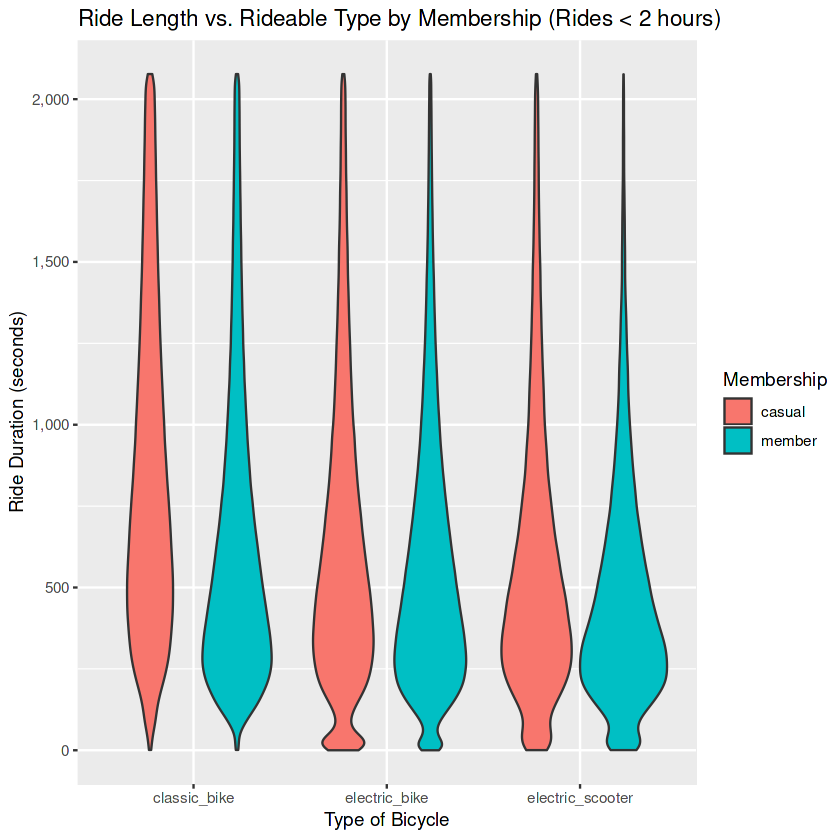

In [32]:
# Plot: "Distribution of Rides by Ridable type and Membership (< 2 hours)"

ggplot(df_filtered, aes(x = rideable_type, y = ride_length_secs, fill = member_casual)) +
  geom_violin() +
  labs(
    title = "Ride Length vs. Rideable Type by Membership (Rides < 2 hours)",
    x = "Type of Bicycle",
    y = "Ride Duration (seconds)",
    fill = "Membership"
  ) +
  scale_y_continuous(labels = comma)

In [33]:
# Average ride length for user by day of week 
# 1 = Sunday, 7 = Saturday

average_ride_day <- complete_rides_clean %>%
  group_by(member_casual, day_of_week) %>%
  summarize(average_ride_day = mean(ride_length_secs, na.rm = TRUE)) %>%
  ungroup()

average_ride_day

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


member_casual,day_of_week,average_ride_day
<chr>,<dbl>,<dbl>
casual,1,788.7539
casual,2,699.1965
casual,3,674.0895
casual,4,686.5278
casual,5,683.9549
casual,6,720.8854
casual,7,796.1347
member,1,647.1126
member,2,593.1593


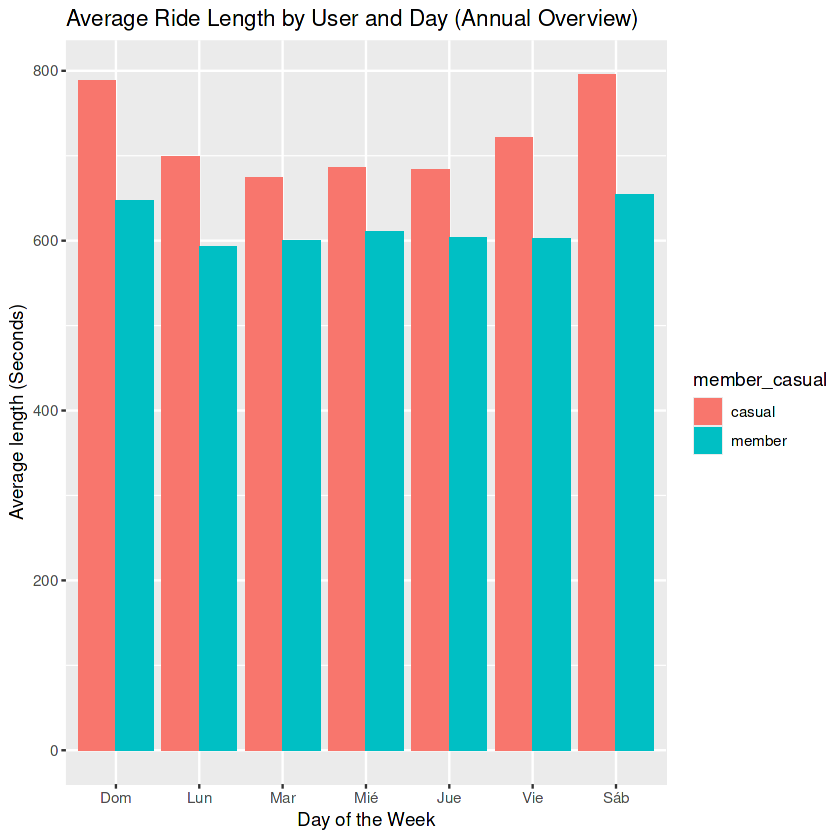

In [34]:
# Plot: "Average Ride Length by User and Day"

ggplot(average_ride_day, 
       aes(x = factor(day_of_week),
           y = average_ride_day,
           fill = member_casual)) +
  geom_bar(stat = "identity",position = "dodge") + 
  scale_x_discrete(labels = c("1" = "Dom", "2" = "Lun",
                              "3" = "Mar", "4" = "Mié",
                              "5" = "Jue", "6" = "Vie", "7" = "Sáb")) +
  labs(title = "Average Ride Length by User and Day (Annual Overview)",
       x = "Day of the Week",
       y = "Average length (Seconds)")

In [35]:
# Count the number of rides for user by day of week 
# 1 = Sunday, 7 = Saturday

ride_count_by_day <- complete_rides %>%
  group_by(member_casual, day_of_week) %>%
  summarize(total_rides = n(), .groups = "drop")

ride_count_by_day

member_casual,day_of_week,total_rides
<chr>,<dbl>,<int>
casual,1,365264
casual,2,248522
casual,3,227546
casual,4,265764
casual,5,260717
casual,6,314269
casual,7,443942
member,1,412676
member,2,522939


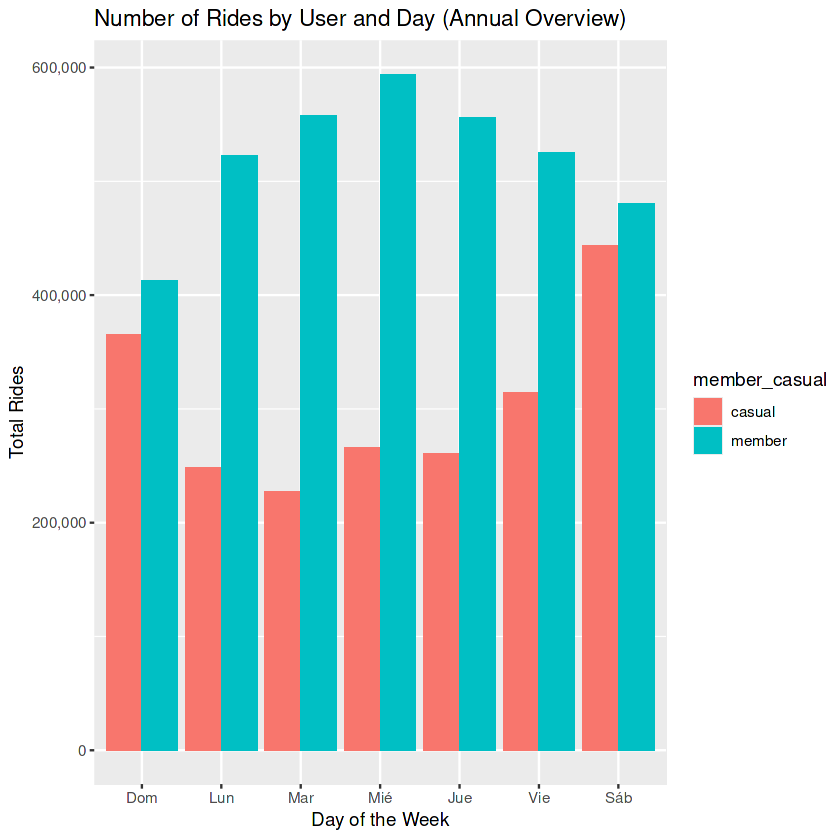

In [36]:
# Plot: "Number of Rides by User and Day "

ggplot(ride_count_by_day, 
       aes(x = factor(day_of_week),
           y = total_rides,
           fill = member_casual)) +
  geom_bar(stat = "identity",position = "dodge") + 
  scale_x_discrete(labels = c("1" = "Dom", "2" = "Lun",
                              "3" = "Mar", "4" = "Mié",
                              "5" = "Jue", "6" = "Vie", "7" = "Sáb")) +
  scale_y_continuous(labels = comma) +
  labs(title = "Number of Rides by User and Day (Annual Overview)",
       x = "Day of the Week",
       y = "Total Rides")

In [37]:
# Average ride length by user and month 

average_ride_by_month <- complete_rides_clean %>%
  mutate(month = month(started_at, label = TRUE)) %>% 
  group_by(member_casual, month) %>%
  summarize(avg_ride_length = mean(ride_length_secs, na.rm = TRUE), .groups = "drop")

print(average_ride_by_month, n = 24) 

# A tibble: 24 × 3
   member_casual month avg_ride_length
   <chr>         <ord>           <dbl>
 1 casual        Jan              512.
 2 casual        Feb              530.
 3 casual        Mar              695.
 4 casual        Apr              722.
 5 casual        May              770.
 6 casual        Jun              778.
 7 casual        Jul              781.
 8 casual        Aug              767.
 9 casual        Sep              698.
10 casual        Oct              703.
11 casual        Nov              623.
12 casual        Dec              577.
13 member        Jan              502.
14 member        Feb              514.
15 member        Mar              574.
16 member        Apr              597.
17 member        May              645.
18 member        Jun              666.
19 member        Jul              663.
20 member        Aug              650.
21 member        Sep              616.
22 member        Oct              602.
23 member        Nov              559.
24 mem

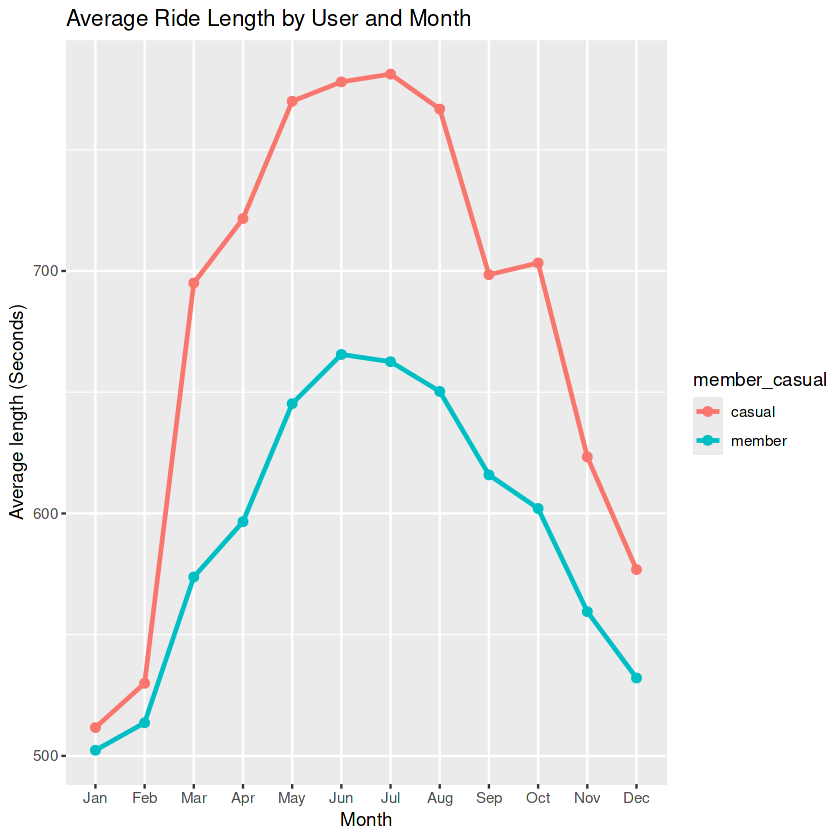

In [38]:
# Plot: "Average Ride Length by User and Month"

ggplot(average_ride_by_month, 
       aes(x = month,
           y = avg_ride_length,
           group = member_casual,
           color = member_casual)) +
  geom_line(linewidth = 1) +
  geom_point(size = 2) +
  scale_y_continuous(labels = comma) +
  labs(title = "Average Ride Length by User and Month",
       x = "Month",
       y = "Average length (Seconds)")


In [39]:
# Count the number of rides for user by month

ride_count_by_month <- complete_rides_clean %>%
  mutate(month = format(as.Date(started_at), "%m")) %>% 
  group_by(member_casual, month) %>%
  summarize(total_rides = n(), .groups = "drop")

ride_count_by_month

member_casual,month,total_rides
<chr>,<chr>,<int>
casual,01,23169
casual,02,26510
casual,03,71987
casual,04,111784
casual,05,191457
casual,06,253645
casual,07,266721
casual,08,270779
casual,09,306346


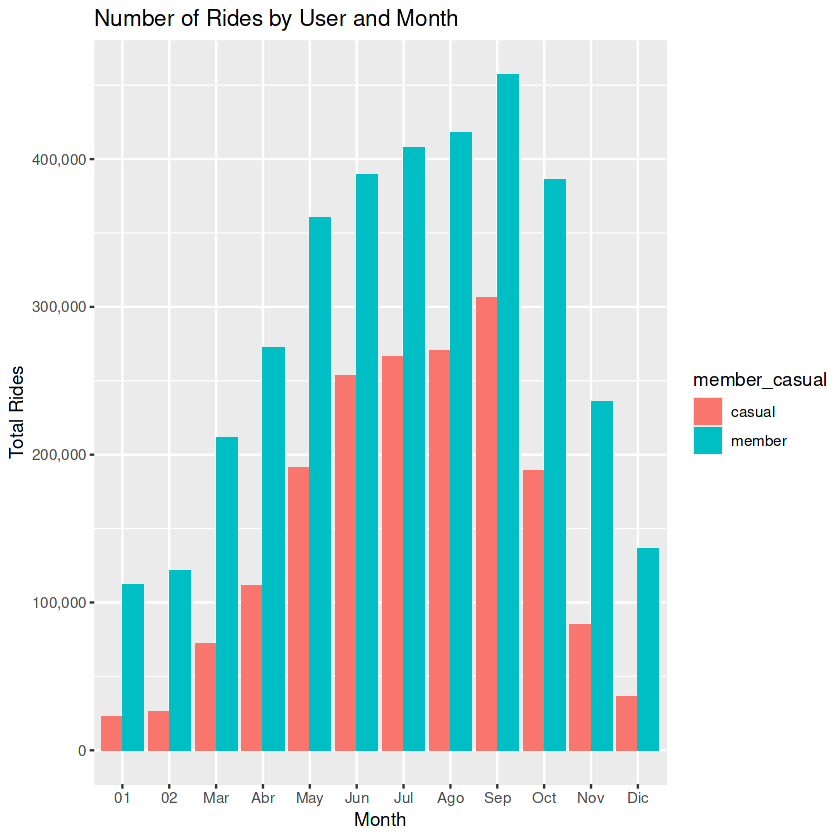

In [40]:
# Plot: "Number of Rides by User and Month"

ggplot(ride_count_by_month, 
       aes(x = factor(month),
           y = total_rides,
           fill = member_casual)) +
  geom_bar(stat = "identity", position = "dodge") + 
  scale_x_discrete(labels = c("03" = "Mar", "04" = "Abr", 
                              "05" = "May", "06" = "Jun", "07" = "Jul", 
                              "08" = "Ago", "09" = "Sep", "10" = "Oct", 
                              "11" = "Nov", "12" = "Dic")) +
  scale_y_continuous(labels = comma) +
  labs(title = "Number of Rides by User and Month",
       x = "Month",
       y = "Total Rides")

## **Analysis**

The main difference between the two types of users lies in the average trip duration; members take significantly shorter trips than occasional users (730.1 seconds for "casual" users and 614.1 seconds for members, ~12 and ~10 minutes, respectively).

When filtering out trips lasting less than two hours, it is observed that occasional users tend to take longer trips, while member users take shorter trips. Vehicle type also plays a role: scooters are used for short trips, while electric and classic bicycles allow for longer trips.

On the other hand, when analyzing the average and total number of trips by day of the week, a difference in usage patterns is evident. Occasional users prefer to use the service more on weekends, especially Saturdays, likely for leisure purposes. Meanwhile, members use it more frequently during weekdays, especially on Wednesdays, but also on Tuesdays and Thursdays, suggesting use associated with a daily routine.

Likewise, between the months of May and October, there is a significant increase in the number of trips for both types of users, coinciding with the summer and fall seasons in the Northern Hemisphere.

It is worth noting that both types of users use all three types of vehicles available; however, there are differences in their preferences. Occasional users have a greater preference for scooters, while member users tend to prefer classic and electric bicycles.


## Step 6: Act

**How ​​do annual members and casual cyclists differ in their use of Cyclistic bikes?**

Based on the analysis conducted, the main difference lies in the average trip duration: annual members tend to make shorter trips than casual cyclists. This suggests that members use the service as part of a daily routine, such as commuting to work or school, while casual cyclists make longer trips, especially on weekends, suggesting recreational use.

Furthermore, a difference is observed in vehicle preference: casual users more frequently use scooters, while members prefer classic and electric bicycles.

---

**Why would casual cyclists purchase annual Cyclistic memberships?**

To answer this question accurately, it will be necessary to conduct surveys targeting casual cyclists to determine their level of awareness about the membership program and their willingness to purchase it. Likewise, it would be useful to survey current members to understand their motivations for acquiring a membership. This information would allow for more effective strategies to attract new members.

---

**How ​​can Cyclistic use digital media to influence casual cyclists to become members?**

According to available data, casual cyclists tend to use the service on weekends and prefer scooters, suggesting a recreational use. Furthermore, it is recommended to run targeted campaigns on weekends, especially Saturdays, when casual users are most likely to use the service. Advertisements or promotions could also be placed directly on the scooters, leveraging the physical channel of contact with these users to encourage them to upgrade to a membership.